# Домашнее задание "Продвинутая линейная алгебра".

In [1]:
import numpy as np
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt 
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA

### Уровень 1:

Найдите спектральное разложение матрицы:

In [2]:
m = np.array([[1, 2],
              [2,3]])
m

array([[1, 2],
       [2, 3]])

In [3]:
a, U = np.linalg.eig(m)
print('Eigenvalues:')
print(np.array(a, dtype=float))
print('\nEigenvectors:')
print(U)
print('\n',np.array(U.dot(np.diag(a)).dot(U.T), dtype=float))

Eigenvalues:
[-0.23606798  4.23606798]

Eigenvectors:
[[-0.85065081 -0.52573111]
 [ 0.52573111 -0.85065081]]

 [[1. 2.]
 [2. 3.]]


___
Постройте зависимость качества восстановления рукописных цифр (MNIST) в зависимости от различного количества компонент PCA. В качестве метрики различия предлагаю использовать MSE.

1 :
5.835372666497116


<Figure size 432x288 with 0 Axes>

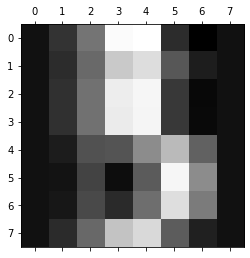

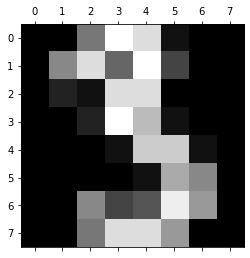

2 :
2.767753947803806


<Figure size 432x288 with 0 Axes>

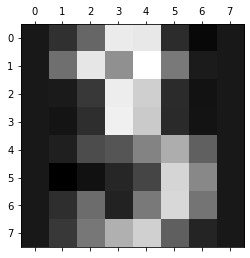

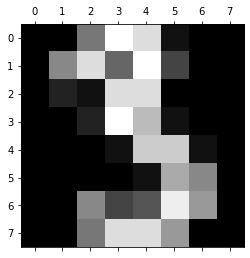

3 :
1.238082050715065


<Figure size 432x288 with 0 Axes>

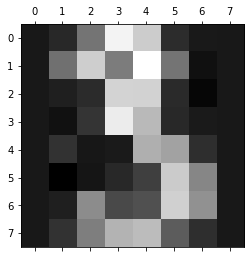

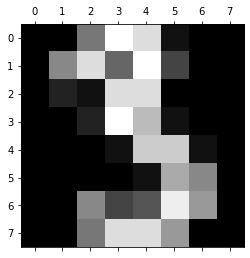

4 :
0.1052868229190251


<Figure size 432x288 with 0 Axes>

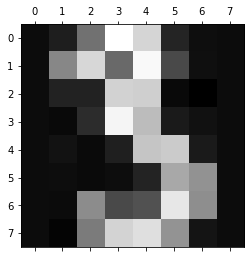

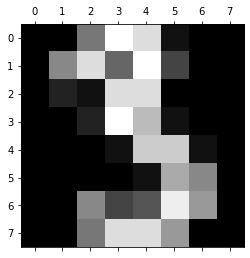

5 :
0.04647957546154831


<Figure size 432x288 with 0 Axes>

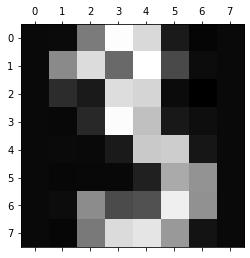

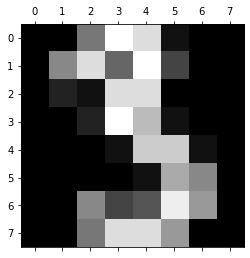

6 :
2.816472246952116e-28


<Figure size 432x288 with 0 Axes>

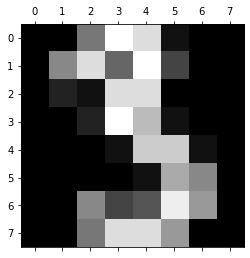

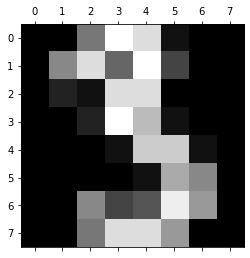

7 :
2.816472246952116e-28


<Figure size 432x288 with 0 Axes>

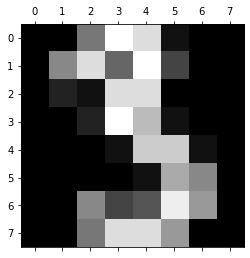

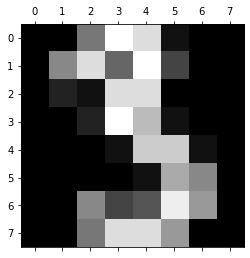

8 :
2.816472246952116e-28


<Figure size 432x288 with 0 Axes>

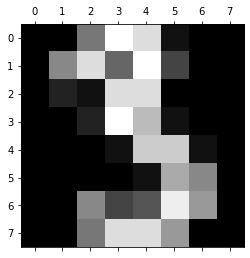

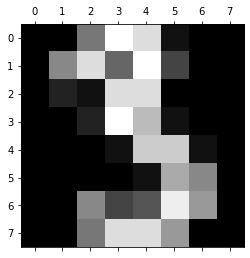

[5.835372666497116, 2.767753947803806, 1.238082050715065, 0.1052868229190251, 0.04647957546154831, 2.816472246952116e-28, 2.816472246952116e-28, 2.816472246952116e-28]


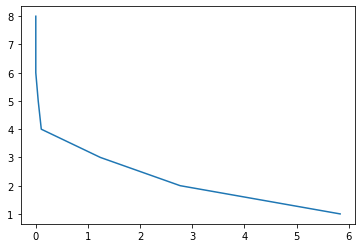

In [5]:
digits = load_digits()
i = np.random.randint(0,10)
mse = []

for n in range(1,9):
    pca_x = PCA(n_components=n)
    pca_y = PCA(n_components=n)

    X = digits.images[i]
    Y = pca_y.inverse_transform(pca_y.fit_transform(X))

    pca_x.fit(X)
    pca_y.fit(Y)


    print(n,':')
    mse.append(mean_squared_error(X, Y))
    print(mean_squared_error(X, Y))
    plt.gray()
    plt.matshow(Y)
    plt.matshow(X)
    plt.show()
    
plt.plot(mse, range(1,9))
print(mse)

Вывод: чем больше компонентов PCA, тем меньше ошибка.